In [1]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(analisi.transparenciacatalunya.cat,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("pvrz-iijx", limit=15000)#12014)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant
0,149187,2021-08-02T00:00:00.000,2021,08Agost,Girona,2004-01-01T00:00:00.000,Nois,Altra
1,160290,2022-06-17T00:00:00.000,2022,06Juny,Àrea Metropolitana BCN,2004-09-19T00:00:00.000,Nois,Marroc
2,152491,2021-11-15T00:00:00.000,2021,11Novembre,Terres de l'Ebre,2004-08-31T00:00:00.000,Nois,Magreb (excloent Marroc)
3,150851,2021-09-30T00:00:00.000,2021,09Setembre,Girona,2005-01-10T00:00:00.000,Nois,Magreb (excloent Marroc)
4,151846,2021-10-27T00:00:00.000,2021,10Octubre,Tarragona,2003-11-16T00:00:00.000,Nois,Altra
...,...,...,...,...,...,...,...,...
12444,163162,2022-09-14T00:00:00.000,2022,09Setembre,Tarragona,2006-07-19T00:00:00.000,Nois,Marroc
12445,163735,2022-10-01T00:00:00.000,2022,10Octubre,NaN,2005-01-01T00:00:00.000,Nois,No informada
12446,134016,2020-01-02T00:00:00.000,2020,01Gener,Barcelona ciutat,2003-01-04T00:00:00.000,Nois,Països Subsharians
12447,150763,2021-09-28T00:00:00.000,2021,09Setembre,Terres de l'Ebre,2004-08-28T00:00:00.000,Nois,Països Subsharians


In [2]:
from matplotlib import pyplot as plt
import numpy as np

<AxesSubplot:>

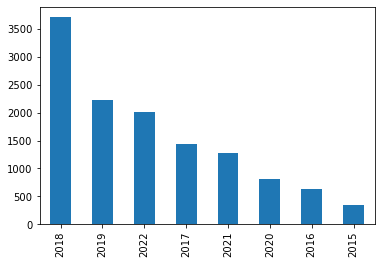

In [3]:
#first, visualize some generalities of the dataset
results_df.any_entrada_sistema.value_counts().plot(kind="bar")

<AxesSubplot:>

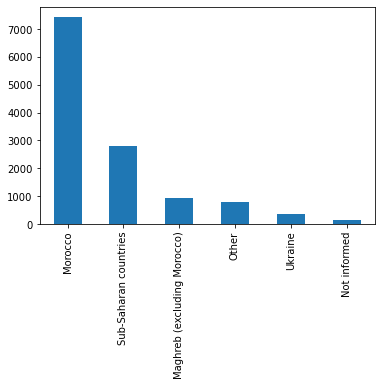

In [4]:
results_df.origen_infant.value_counts().rename({"Marroc":"Morocco", "Països Subsharians":"Sub-Saharan countries", "Magreb (excloent Marroc)":"Maghreb (excluding Morocco)", "Altra":"Other", "Ucraïna":"Ukraine", "No informada":"Not informed"}).plot(kind="bar")

In [64]:
results_df.origen_infant.value_counts()/sum(results_df.origen_infant.value_counts())

Marroc                      0.597058
Països Subsharians          0.224339
Other/not informed          0.075235
Magreb (excloent Marroc)    0.074190
Ucraïna                     0.029178
Name: origen_infant, dtype: float64

<AxesSubplot:>

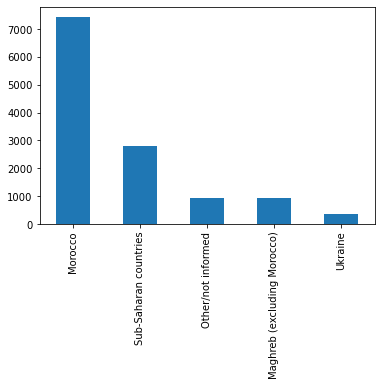

In [5]:
#join the column of Altra and No informada
results_df=results_df.replace({"Altra": "Other/not informed", "No informada": "Other/not informed"})
results_df.origen_infant.value_counts().rename({"Marroc":"Morocco", "Països Subsharians":"Sub-Saharan countries", "Magreb (excloent Marroc)":"Maghreb (excluding Morocco)", "Ucraïna":"Ukraine"}).plot(kind="bar")

In [6]:
#create a dataset in wich compare the origin in each year
año_origen = pd.crosstab(index=results_df.any_entrada_sistema,
            columns=results_df.origen_infant)
año_origen

origen_infant,Magreb (excloent Marroc),Marroc,Other/not informed,Països Subsharians,Ucraïna
any_entrada_sistema,,,,,
2015,39,212,68,31,0
2016,62,425,89,63,0
2017,117,1054,120,146,0
2018,149,2855,146,559,0
2019,143,1530,177,369,0
2020,122,328,75,285,0
2021,170,462,98,549,0
2022,122,563,168,790,363


AttributeError: 'FancyArrow' object has no attribute 'get_width'

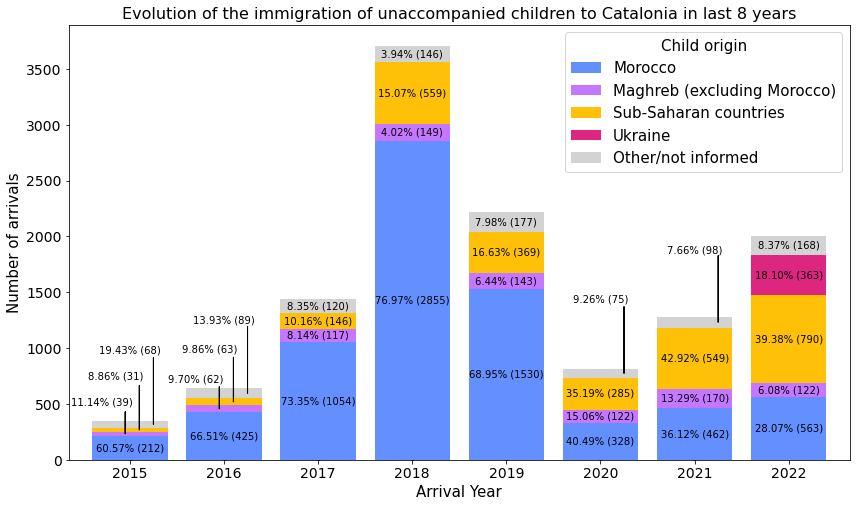

In [63]:
año_origen=año_origen[['Marroc', 'Magreb (excloent Marroc)', 'Països Subsharians', 'Ucraïna', 'Other/not informed']]
# this is only for reorder the columns

#make a stacked plot bar
colores=["#648FFF", "#c577ff", "#FFC107", "#DC267F", "lightgray"]
ax=año_origen.plot(kind='bar', width=0.8, stacked=True, figsize=(14,8), color=colores)
plt.gcf().gca().set_xlabel("Arrival Year", fontsize = 15)
plt.gcf().gca().set_ylabel("Number of arrivals", fontsize = 15)
plt.gcf().gca().set_title("Evolution of the immigration of unaccompanied children to Catalonia in last 8 years", fontsize = 16)
legend = plt.legend(['Morocco','Maghreb (excluding Morocco)', 'Sub-Saharan countries', 'Ukraine', 'Other/not informed',], title = "Child origin", fontsize=15, title_fontsize = 15)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.yticks(fontsize=14)

#add the vaues of the number of children of each origin
abs_values = año_origen.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())

#counters for move the position of the labels that don't fit inside bars
xmove=0.1
ymove=300
count=0
for path in ax.patches:
    width, height = path.get_width(), path.get_height()
    #enought space
    if height>100:
        abs_value, rel_value = next(labels)
        label = f"{rel_value:.2f}% ({abs_value})"
        x, y = path.get_xy()
        ax.text(x=x + width / 2, 
                y=y + height / 2, 
                s=label,
                horizontalalignment='center', 
                verticalalignment='center'
                )
        
    # notenought space
    if height>10 and height<100:
        abs_value, rel_value = next(labels)
        label = f"{rel_value:.2f}% ({abs_value})"
        x, y = path.get_xy()
        
        #change writing site
        count=count+1
        if count==3:
            xmove=0.25
            ymove=500
        if count==5:
            xmove=0.4
            ymove=700
            
        ax.text(x=x+xmove, 
                y=y+ymove, 
                s=label,
                horizontalalignment='center', 
                verticalalignment='center'
                )
        #plot arrows inside the plot that help to distinguish between the data
        ax.arrow(x+0.25+xmove, y+ height / 2, 0, ymove-100)
    
    #if zero (ukraine data) write nothing
    if height==0:
        abs_value, rel_value = next(labels)
        label = "-"
        x, y = path.get_xy()
        ax.text(x=x + width / 2, 
                y=y + height / 2, 
                s=label,
                horizontalalignment='center', 
                verticalalignment='center'
                ) 

plt.savefig("myplot.png")

In [8]:
#only take the values in 2020
veinteveinte=results_df[results_df.any_entrada_sistema=='2020']
veinteveinte

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant
46,141662,2020-11-08T00:00:00.000,2020,11Novembre,Barcelona ciutat,2003-08-14T00:00:00.000,Nois,Other/not informed
247,139888,2020-08-31T00:00:00.000,2020,08Agost,Girona,2003-07-16T00:00:00.000,Nois,Marroc
280,141941,2020-11-17T00:00:00.000,2020,11Novembre,Lleida,2002-05-16T00:00:00.000,Nois,Marroc
460,134305,2020-01-13T00:00:00.000,2020,01Gener,Barcelona comarques,2001-09-24T00:00:00.000,Nois,Marroc
605,141476,2020-10-31T00:00:00.000,2020,10Octubre,Barcelona comarques,2007-06-16T00:00:00.000,Noies,Magreb (excloent Marroc)
...,...,...,...,...,...,...,...,...
11697,134539,2020-01-21T00:00:00.000,2020,01Gener,Lleida,2002-05-03T00:00:00.000,Nois,Marroc
11699,140044,2020-09-07T00:00:00.000,2020,09Setembre,NaN,2006-02-28T00:00:00.000,Nois,Marroc
11819,142604,2020-12-15T00:00:00.000,2020,12Desembre,Barcelona comarques,2003-10-04T00:00:00.000,Nois,Other/not informed
12121,136277,2020-03-10T00:00:00.000,2020,03Març,Tarragona,2003-01-11T00:00:00.000,Nois,Marroc


In [9]:
# drop datetimes that are nans
veinteveinte = veinteveinte[veinteveinte.data_entrada_sistema.notna()]
veinteveinte

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant
46,141662,2020-11-08T00:00:00.000,2020,11Novembre,Barcelona ciutat,2003-08-14T00:00:00.000,Nois,Other/not informed
247,139888,2020-08-31T00:00:00.000,2020,08Agost,Girona,2003-07-16T00:00:00.000,Nois,Marroc
280,141941,2020-11-17T00:00:00.000,2020,11Novembre,Lleida,2002-05-16T00:00:00.000,Nois,Marroc
460,134305,2020-01-13T00:00:00.000,2020,01Gener,Barcelona comarques,2001-09-24T00:00:00.000,Nois,Marroc
605,141476,2020-10-31T00:00:00.000,2020,10Octubre,Barcelona comarques,2007-06-16T00:00:00.000,Noies,Magreb (excloent Marroc)
...,...,...,...,...,...,...,...,...
11697,134539,2020-01-21T00:00:00.000,2020,01Gener,Lleida,2002-05-03T00:00:00.000,Nois,Marroc
11699,140044,2020-09-07T00:00:00.000,2020,09Setembre,NaN,2006-02-28T00:00:00.000,Nois,Marroc
11819,142604,2020-12-15T00:00:00.000,2020,12Desembre,Barcelona comarques,2003-10-04T00:00:00.000,Nois,Other/not informed
12121,136277,2020-03-10T00:00:00.000,2020,03Març,Tarragona,2003-01-11T00:00:00.000,Nois,Marroc


In [10]:
from datetime import datetime
import pytz
datetime_in_Madrid = datetime.now(pytz.timezone('Europe/Madrid'))

In [11]:
# add datetime column with python datetimes
veinteveinte["data_entrada_sistema_datetime"] = pd.to_datetime(veinteveinte.data_entrada_sistema)
veinteveinte

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant,data_entrada_sistema_datetime
46,141662,2020-11-08T00:00:00.000,2020,11Novembre,Barcelona ciutat,2003-08-14T00:00:00.000,Nois,Other/not informed,2020-11-08
247,139888,2020-08-31T00:00:00.000,2020,08Agost,Girona,2003-07-16T00:00:00.000,Nois,Marroc,2020-08-31
280,141941,2020-11-17T00:00:00.000,2020,11Novembre,Lleida,2002-05-16T00:00:00.000,Nois,Marroc,2020-11-17
460,134305,2020-01-13T00:00:00.000,2020,01Gener,Barcelona comarques,2001-09-24T00:00:00.000,Nois,Marroc,2020-01-13
605,141476,2020-10-31T00:00:00.000,2020,10Octubre,Barcelona comarques,2007-06-16T00:00:00.000,Noies,Magreb (excloent Marroc),2020-10-31
...,...,...,...,...,...,...,...,...,...
11697,134539,2020-01-21T00:00:00.000,2020,01Gener,Lleida,2002-05-03T00:00:00.000,Nois,Marroc,2020-01-21
11699,140044,2020-09-07T00:00:00.000,2020,09Setembre,NaN,2006-02-28T00:00:00.000,Nois,Marroc,2020-09-07
11819,142604,2020-12-15T00:00:00.000,2020,12Desembre,Barcelona comarques,2003-10-04T00:00:00.000,Nois,Other/not informed,2020-12-15
12121,136277,2020-03-10T00:00:00.000,2020,03Març,Tarragona,2003-01-11T00:00:00.000,Nois,Marroc,2020-03-10


In [12]:
#count arrivals each month
count=np.zeros(12)

for n in range(1, 9):
    start = datetime.strptime(f"01/0{n}/2020", '%d/%m/%Y')
    final   = datetime.strptime(f"01/0{n+1}/2020", '%d/%m/%Y')
    data_range =       veinteveinte[veinteveinte.data_entrada_sistema_datetime      < final]
    data_range = data_range[data_range.data_entrada_sistema_datetime>=start]
    count[n-1]=data_range.shape[0]
    
start = datetime.strptime(f"01/09/2020", '%d/%m/%Y')
final   = datetime.strptime(f"01/10/2020", '%d/%m/%Y')
data_range =       veinteveinte[veinteveinte.data_entrada_sistema_datetime      < final]
data_range = data_range[data_range.data_entrada_sistema_datetime>=start]
count[9]=data_range.shape[0]
    
for n in range(10, 12):
    start = datetime.strptime(f"01/{n}/2020", '%d/%m/%Y')
    final   = datetime.strptime(f"01/{n+1}/2020", '%d/%m/%Y')
    data_range =       veinteveinte[veinteveinte.data_entrada_sistema_datetime      < final]
    data_range = data_range[data_range.data_entrada_sistema_datetime>=start]
    count[n-1]=data_range.shape[0]
    
count

array([148.,  95.,  60.,   8.,  19.,  40.,  81.,  74.,   0.,  70.,  58.,
         0.])

<ipython-input-13-0b8b8b900292>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


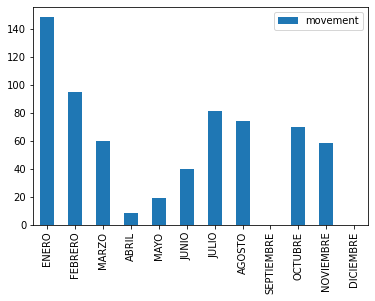

In [13]:
meses = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO',
               'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

result=pd.DataFrame({'MES':meses, 'movement':count})

result.plot(kind='bar')
ax = plt.axes()
ax.set_xticks(range(12))
ax.set_xticklabels(meses)
plt.show()

In [14]:
#interesant, but not much, we see that in the lockdown there are less arrivals but in other months too

<AxesSubplot:>

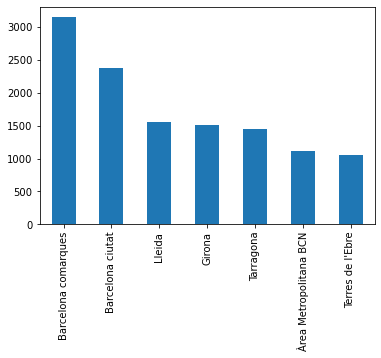

In [15]:
#analize other interesant data
results_df.servei_territorial_gestio.value_counts().plot(kind="bar")

In [16]:
results_df.servei_territorial_gestio.value_counts()


Barcelona comarques       3143
Barcelona ciutat          2367
Lleida                    1552
Girona                    1510
Tarragona                 1445
Àrea Metropolitana BCN    1107
Terres de l'Ebre          1056
Name: servei_territorial_gestio, dtype: int64

In [17]:
ttal=sum(results_df.servei_territorial_gestio.value_counts())
ttal

12180

In [18]:
results_df.servei_territorial_gestio.value_counts()/ttal

Barcelona comarques       0.258046
Barcelona ciutat          0.194335
Lleida                    0.127422
Girona                    0.123974
Tarragona                 0.118637
Àrea Metropolitana BCN    0.090887
Terres de l'Ebre          0.086700
Name: servei_territorial_gestio, dtype: float64

In [19]:
sum(results_df.servei_territorial_gestio.value_counts()/ttal)

1.0

In [20]:
# drop datetimes that are nans for teh data naixament infant
results_df = results_df[results_df.data_naixement_infant.notna()]
results_df

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant
0,149187,2021-08-02T00:00:00.000,2021,08Agost,Girona,2004-01-01T00:00:00.000,Nois,Other/not informed
1,160290,2022-06-17T00:00:00.000,2022,06Juny,Àrea Metropolitana BCN,2004-09-19T00:00:00.000,Nois,Marroc
2,152491,2021-11-15T00:00:00.000,2021,11Novembre,Terres de l'Ebre,2004-08-31T00:00:00.000,Nois,Magreb (excloent Marroc)
3,150851,2021-09-30T00:00:00.000,2021,09Setembre,Girona,2005-01-10T00:00:00.000,Nois,Magreb (excloent Marroc)
4,151846,2021-10-27T00:00:00.000,2021,10Octubre,Tarragona,2003-11-16T00:00:00.000,Nois,Other/not informed
...,...,...,...,...,...,...,...,...
12444,163162,2022-09-14T00:00:00.000,2022,09Setembre,Tarragona,2006-07-19T00:00:00.000,Nois,Marroc
12445,163735,2022-10-01T00:00:00.000,2022,10Octubre,NaN,2005-01-01T00:00:00.000,Nois,Other/not informed
12446,134016,2020-01-02T00:00:00.000,2020,01Gener,Barcelona ciutat,2003-01-04T00:00:00.000,Nois,Països Subsharians
12447,150763,2021-09-28T00:00:00.000,2021,09Setembre,Terres de l'Ebre,2004-08-28T00:00:00.000,Nois,Països Subsharians


In [21]:
# add datetime column with python datetimes
results_df["data_naixement_infant_datetime"] = pd.to_datetime(results_df.data_naixement_infant)

In [22]:
results_df

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant,data_naixement_infant_datetime
0,149187,2021-08-02T00:00:00.000,2021,08Agost,Girona,2004-01-01T00:00:00.000,Nois,Other/not informed,2004-01-01
1,160290,2022-06-17T00:00:00.000,2022,06Juny,Àrea Metropolitana BCN,2004-09-19T00:00:00.000,Nois,Marroc,2004-09-19
2,152491,2021-11-15T00:00:00.000,2021,11Novembre,Terres de l'Ebre,2004-08-31T00:00:00.000,Nois,Magreb (excloent Marroc),2004-08-31
3,150851,2021-09-30T00:00:00.000,2021,09Setembre,Girona,2005-01-10T00:00:00.000,Nois,Magreb (excloent Marroc),2005-01-10
4,151846,2021-10-27T00:00:00.000,2021,10Octubre,Tarragona,2003-11-16T00:00:00.000,Nois,Other/not informed,2003-11-16
...,...,...,...,...,...,...,...,...,...
12444,163162,2022-09-14T00:00:00.000,2022,09Setembre,Tarragona,2006-07-19T00:00:00.000,Nois,Marroc,2006-07-19
12445,163735,2022-10-01T00:00:00.000,2022,10Octubre,NaN,2005-01-01T00:00:00.000,Nois,Other/not informed,2005-01-01
12446,134016,2020-01-02T00:00:00.000,2020,01Gener,Barcelona ciutat,2003-01-04T00:00:00.000,Nois,Països Subsharians,2003-01-04
12447,150763,2021-09-28T00:00:00.000,2021,09Setembre,Terres de l'Ebre,2004-08-28T00:00:00.000,Nois,Països Subsharians,2004-08-28


In [23]:
#study the oldest
final   = datetime.strptime('01/01/1980', '%d/%m/%Y')
results_df[results_df.data_naixement_infant_datetime      < final].shape[0]

0

In [24]:
#study the youngest
start  = datetime.strptime('01/01/2021', '%d/%m/%Y')
results_df[results_df.data_naixement_infant_datetime     >= start].shape[0]

0

In [25]:
#create a new column that save the years at which each childre come to Catalonia
start = datetime.strptime('01/01/1980', '%d/%m/%Y')
final = datetime.strptime('01/01/1981', '%d/%m/%Y')
results_df_orden =       results_df[results_df.data_naixement_infant_datetime      < final]
results_df_orden = results_df_orden[results_df_orden.data_naixement_infant_datetime>=start]
years=np.zeros(len(results_df_orden))
for i in range(len(results_df_orden)):
    years[i]=int(results_df_orden.iloc[i]['any_entrada_sistema'])-1980
results_df_orden=results_df_orden.assign(Years=years)
results_df_orden

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant,data_naixement_infant_datetime,Years
9640,96019,2016-11-21T00:00:00.000,2016,11Novembre,Girona,1980-12-31T00:00:00.000,Nois,Magreb (excloent Marroc),1980-12-31,36.0


In [26]:
#final results 
for n in range(1981, 2022):
    start = datetime.strptime(f"01/01/{n}", '%d/%m/%Y')
    final   = datetime.strptime(f"01/01/{n+1}", '%d/%m/%Y')
    results_df_range =       results_df[results_df.data_naixement_infant_datetime      < final]
    results_df_range = results_df_range[results_df_range.data_naixement_infant_datetime>=start]
    years=np.zeros(len(results_df_range))
    for i in range(len(results_df_range)):
        years[i]=int(results_df_range.iloc[i]['any_entrada_sistema'])-n
    results_df_range=results_df_range.assign(Years=years)
    results_df_orden=pd.concat([results_df_orden,results_df_range])
results_df_orden

,id_infant_jove,data_entrada_sistema,any_entrada_sistema,mes_entrada_sistema,servei_territorial_gestio,data_naixement_infant,sexe_infant,origen_infant,data_naixement_infant_datetime,Years
9640,96019,2016-11-21T00:00:00.000,2016,11Novembre,Girona,1980-12-31T00:00:00.000,Nois,Magreb (excloent Marroc),1980-12-31,36.0
10954,83602,2015-07-28T00:00:00.000,2015,07Juliol,Barcelona ciutat,1985-11-19T00:00:00.000,Nois,Marroc,1985-11-19,30.0
12309,155870,2022-03-04T00:00:00.000,2022,03Març,Terres de l'Ebre,1988-02-18T00:00:00.000,Nois,Països Subsharians,1988-02-18,34.0
10802,103396,2017-07-06T00:00:00.000,2017,07Juliol,Girona,1990-10-19T00:00:00.000,Nois,Marroc,1990-10-19,27.0
1871,118503,2018-09-20T00:00:00.000,2018,09Setembre,Àrea Metropolitana BCN,1992-11-03T00:00:00.000,Nois,Països Subsharians,1992-11-03,26.0
...,...,...,...,...,...,...,...,...,...,...
2925,157630,2022-04-12T00:00:00.000,2022,04Abril,Girona,2019-06-26T00:00:00.000,Nois,Ucraïna,2019-06-26,3.0
3901,131543,2019-10-02T00:00:00.000,2019,10Octubre,Barcelona ciutat,2019-10-30T00:00:00.000,Nois,Marroc,2019-10-30,0.0
6487,157659,2022-04-12T00:00:00.000,2022,04Abril,Girona,2019-02-06T00:00:00.000,Nois,Ucraïna,2019-02-06,3.0
11178,124672,2019-02-28T00:00:00.000,2019,02Febrer,Girona,2019-03-26T00:00:00.000,Nois,Magreb (excloent Marroc),2019-03-26,0.0


<AxesSubplot:>

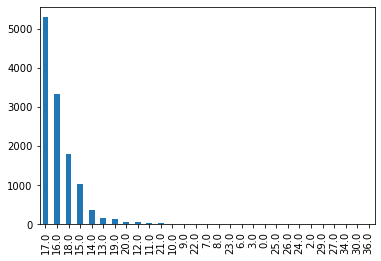

In [27]:
results_df_orden.Years.value_counts().plot(kind="bar")

In [28]:
#we see that most of the children come with 17, 16, 18, 15 and 14 years which is a age they can go to school

In [29]:
#create a dataset in which compare the territory they come to catalonia at which age
lugar_años=pd.crosstab(index=results_df_orden.servei_territorial_gestio,
            columns=results_df_orden.Years)
lugar_años

Years,0.0,2.0,3.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,...,22.0,23.0,24.0,25.0,26.0,27.0,29.0,30.0,34.0,36.0
servei_territorial_gestio,,,,,,,,,,,,,,,,,,,,,
Barcelona ciutat,1,0,2,1,1,2,0,4,4,9,...,5,2,1,0,0,0,0,1,0,0
Barcelona comarques,0,0,0,2,7,5,8,9,13,27,...,3,3,0,0,2,0,0,0,0,0
Girona,2,0,2,2,2,2,6,3,4,11,...,4,0,1,0,0,2,0,0,0,1
Lleida,0,0,0,0,0,0,1,0,0,4,...,1,0,0,1,0,0,0,0,0,0
Tarragona,0,1,0,1,0,1,0,1,1,5,...,1,1,0,1,0,0,0,0,0,0
Terres de l'Ebre,0,0,0,0,0,0,1,1,0,4,...,1,0,0,1,0,0,1,0,1,0
Àrea Metropolitana BCN,0,1,0,0,0,0,2,1,6,5,...,1,1,1,0,1,0,1,0,0,0


In [30]:
# calculate the mean age
suma=np.zeros(7)
count_tot=np.zeros(7)
mean=np.zeros(7)

for i in range(0,7):
    n=6
    suma[i]=suma[i]+lugar_años.iloc[i,0]*0
    count_tot[i]=count_tot[i]+lugar_años.iloc[i,0]
    suma[i]=suma[i]+lugar_años.iloc[i,1]*2
    count_tot[i]=count_tot[i]+lugar_años.iloc[i,1]
    suma[i]=suma[i]+lugar_años.iloc[i,2]*3
    count_tot[i]=count_tot[i]+lugar_años.iloc[i,2]
    for j in range(3,25):
        suma[i]=suma[i]+lugar_años.iloc[i,j]*n
        count_tot[i]=count_tot[i]+lugar_años.iloc[i,j]
        n=n+1 
    suma[i]=suma[i]+lugar_años.iloc[i,25]*29
    count_tot[i]=count_tot[i]+lugar_años.iloc[i,25]
    suma[i]=suma[i]+lugar_años.iloc[i,26]*30
    count_tot[i]=count_tot[i]+lugar_años.iloc[i,26]
    suma[i]=suma[i]+lugar_años.iloc[i,27]*36
    count_tot[i]=count_tot[i]+lugar_años.iloc[i,27]
    mean[i]=suma[i]/count_tot[i]
    
print(mean)
print(count_tot)
total=sum(count_tot)
total

[16.54480135 16.43111677 16.51623592 16.65764023 16.61218837 16.70265152
 16.48188406]
[2366. 3143. 1509. 1551. 1444. 1056. 1104.]


12173.0

In [31]:
#the mean is more or less teh same for each territory

In [32]:
#count the number of children in school age
count=np.zeros(7)
for i in range(0,7):
    for j in range(2,15):
        count[i]=count[i]+lugar_años.iloc[i,j]

count

array([1936., 2688., 1217., 1266., 1199.,  889.,  940.])

In [33]:
#create a dataset to see the scholarized kids at each territory
territorios=['Barcelona ciutat', 'Barcelona comarques', 'Girona', 'Lleida', 'Tarragona', 'Terres de l\'Ebre', 'Àrea Metropolitana BCN']
data2=pd.DataFrame({'Territories':territorios, 'schooled_child':count, 'total':count_tot})
data2

,Territories,schooled_child,total
0,Barcelona ciutat,1936.0,2366.0
1,Barcelona comarques,2688.0,3143.0
2,Girona,1217.0,1509.0
3,Lleida,1266.0,1551.0
4,Tarragona,1199.0,1444.0
5,Terres de l'Ebre,889.0,1056.0
6,Àrea Metropolitana BCN,940.0,1104.0


In [34]:
import geopandas as gpd
import pprint

import os
 
# Get the list of all shp files in BCN500 directory
dir_list_cat = [x for x in os.listdir("./divisions_administratius/") if x[-4:]==".shp"]
# first number: resolution/ scale, second number: Date

dir_list_cat

['divisions-administratives-v2r1-caps-municipi-20220801.shp',
 'divisions-administratives-v2r1-catalunya-100000-20220801.shp',
 'divisions-administratives-v2r1-catalunya-1000000-20220801.shp',
 'divisions-administratives-v2r1-catalunya-250000-20220801.shp',
 'divisions-administratives-v2r1-catalunya-5000-20220801.shp',
 'divisions-administratives-v2r1-catalunya-50000-20220801.shp',
 'divisions-administratives-v2r1-catalunya-500000-20220801.shp',
 'divisions-administratives-v2r1-comarques-100000-20220801.shp',
 'divisions-administratives-v2r1-comarques-1000000-20220801.shp',
 'divisions-administratives-v2r1-comarques-250000-20220801.shp',
 'divisions-administratives-v2r1-comarques-5000-20220801.shp',
 'divisions-administratives-v2r1-comarques-50000-20220801.shp',
 'divisions-administratives-v2r1-comarques-500000-20220801.shp',
 'divisions-administratives-v2r1-municipis-100000-20220801.shp',
 'divisions-administratives-v2r1-municipis-1000000-20220801.shp',
 'divisions-administratives-v2r

In [35]:
# list only highest resolution
dir_list_cat = [x for x in os.listdir("./divisions_administratius/") if x[-21:]=="-1000000-20220801.shp"]
dir_list_cat

['divisions-administratives-v2r1-catalunya-1000000-20220801.shp',
 'divisions-administratives-v2r1-comarques-1000000-20220801.shp',
 'divisions-administratives-v2r1-municipis-1000000-20220801.shp',
 'divisions-administratives-v2r1-provincies-1000000-20220801.shp',
 'divisions-administratives-v2r1-vegueries-1000000-20220801.shp']

In [36]:
ids = {x:x[31:-21] for x in dir_list_cat}
ids

{'divisions-administratives-v2r1-catalunya-1000000-20220801.shp': 'catalunya',
 'divisions-administratives-v2r1-comarques-1000000-20220801.shp': 'comarques',
 'divisions-administratives-v2r1-municipis-1000000-20220801.shp': 'municipis',
 'divisions-administratives-v2r1-provincies-1000000-20220801.shp': 'provincies',
 'divisions-administratives-v2r1-vegueries-1000000-20220801.shp': 'vegueries'}

catalunya


,NOMCAT,CAPCAT,AREACA5000,geometry
0,Catalunya,Barcelona,32103.99495,"MULTIPOLYGON (((300644.450 4494148.850, 300643..."


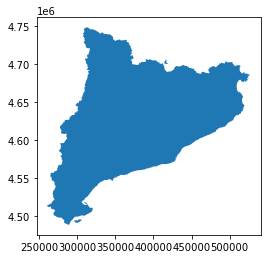






comarques


,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.6317,"POLYGON ((373020.449 4590188.741, 372482.744 4..."
1,02,Alt Empordà,Figueres,1356.6431,"MULTIPOLYGON (((513760.140 4662388.220, 513758..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5498,"POLYGON ((386593.300 4595896.200, 388616.100 4..."
3,04,Alt Urgell,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360800.100 4649174.000, 360624..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4..."


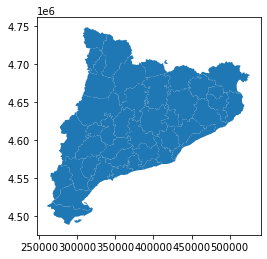






municipis


,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry
0,250019,Abella de la Conca,Abella de la Conca,77.970082,25,Pallars Jussà,Tremp,06,Alt Pirineu,*,25,Lleida,Lleida,"POLYGON ((346712.091 4676851.376, 347046.795 4..."
1,080018,Abrera,Abrera,19.978096,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"POLYGON ((410315.500 4598888.500, 410888.800 4..."
2,250024,Àger,Àger,160.202629,23,Noguera,Balaguer,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((308157.549 4660767.518, 308220.898 4..."
3,250030,Agramunt,Agramunt,79.359535,38,Urgell,Tàrrega,03,Lleida,Lleida,25,Lleida,Lleida,"MULTIPOLYGON (((342659.900 4635474.900, 343006..."
4,080023,Aguilar de Segarra,Aguilar de Segarra,43.219825,07,Bages,Manresa,07,Catalunya Central,*,08,Barcelona,Barcelona,"POLYGON ((385155.746 4625034.736, 385288.746 4..."


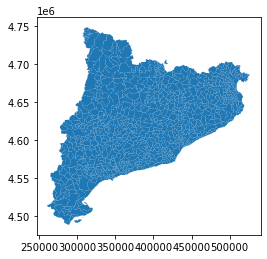






provincies


,CODIPROV,NOMPROV,CAPPROV,AREAP5000,geometry
0,08,Barcelona,Barcelona,7730.4124,"MULTIPOLYGON (((386888.695 4561204.584, 386881..."
1,17,Girona,Girona,5902.2156,"MULTIPOLYGON (((482690.024 4613155.364, 482688..."
2,25,Lleida,Lleida,12165.6897,"MULTIPOLYGON (((393371.457 4638570.630, 393374..."
3,43,Tarragona,Tarragona,6305.6772,"MULTIPOLYGON (((300644.450 4494148.850, 300643..."


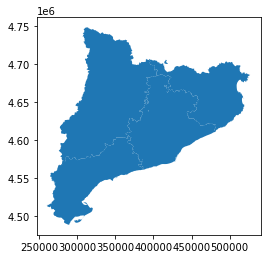






vegueries


,CODIVEGUE,NOMVEGUE,CAPVEGUE,AREAV5000,geometry
0,06,Alt Pirineu,*,5142.598106,"MULTIPOLYGON (((360800.100 4649174.000, 360624..."
1,01,Barcelona,Barcelona,2350.074284,"MULTIPOLYGON (((430781.151 4576638.077, 430763..."
2,04,Camp de Tarragona,Tarragona,2703.384680,"MULTIPOLYGON (((335047.090 4547015.090, 335000..."
3,07,Catalunya Central,*,5057.499443,"MULTIPOLYGON (((371355.616 4611241.896, 371360..."
4,02,Girona,Girona,5581.293163,"MULTIPOLYGON (((482690.024 4613155.364, 482688..."


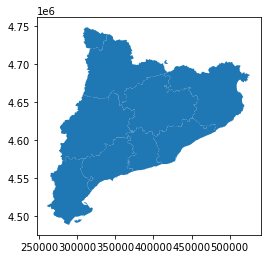

In [37]:
cat_maps = {}
for maps in dir_list_cat:
    cat_maps[ids[maps]] = gpd.read_file("./divisions_administratius/"+maps, crs="EPSG:4326")
    print(ids[maps])
    display(cat_maps[ids[maps]].head())
    cat_maps[ids[maps]].plot()
    plt.show()
    print("\n\n\n\n")

In [38]:
#we will use the division for vergueries and municipis
vegueries=cat_maps["vegueries"]
vegueries

,CODIVEGUE,NOMVEGUE,CAPVEGUE,AREAV5000,geometry
0,06,Alt Pirineu,*,5142.598106,"MULTIPOLYGON (((360800.100 4649174.000, 360624..."
1,01,Barcelona,Barcelona,2350.074284,"MULTIPOLYGON (((430781.151 4576638.077, 430763..."
2,04,Camp de Tarragona,Tarragona,2703.384680,"MULTIPOLYGON (((335047.090 4547015.090, 335000..."
3,07,Catalunya Central,*,5057.499443,"MULTIPOLYGON (((371355.616 4611241.896, 371360..."
4,02,Girona,Girona,5581.293163,"MULTIPOLYGON (((482690.024 4613155.364, 482688..."
5,03,Lleida,Lleida,5584.003483,"POLYGON ((348524.976 4664596.302, 348224.932 4..."
6,08,Penedès,*,1746.282584,"MULTIPOLYGON (((386888.695 4561204.584, 386881..."
7,05,Terres de l'Ebre,Tortosa,3305.861416,"MULTIPOLYGON (((300644.450 4494148.850, 300643..."
8,00,Val d'Aran (entitat territorial singular),Vielha,632.997791,"POLYGON ((314392.071 4747419.593, 314795.594 4..."


In [39]:
#our data correspond to...
lleida=vegueries[vegueries["NOMVEGUE"].isin(['Lleida', 'Alt Pirineu'])]
girona=vegueries[vegueries["NOMVEGUE"].isin(['Girona'])]
area_metropolitana_BCN =vegueries[vegueries["NOMVEGUE"].isin(['Barcelona', 'Penedès'])]
terres_de_lebre=vegueries[vegueries["NOMVEGUE"].isin(['Terres de l\'Ebre'])]
tarragona=vegueries[vegueries["NOMVEGUE"].isin(['Camp de Tarragona'])]
BCN_comarques=vegueries[vegueries["NOMVEGUE"].isin(['Catalunya Central'])]

In [40]:
municipis=cat_maps["municipis"]
municipis

,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry
0,250019,Abella de la Conca,Abella de la Conca,77.970082,25,Pallars Jussà,Tremp,06,Alt Pirineu,*,25,Lleida,Lleida,"POLYGON ((346712.091 4676851.376, 347046.795 4..."
1,080018,Abrera,Abrera,19.978096,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"POLYGON ((410315.500 4598888.500, 410888.800 4..."
2,250024,Àger,Àger,160.202629,23,Noguera,Balaguer,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((308157.549 4660767.518, 308220.898 4..."
3,250030,Agramunt,Agramunt,79.359535,38,Urgell,Tàrrega,03,Lleida,Lleida,25,Lleida,Lleida,"MULTIPOLYGON (((342659.900 4635474.900, 343006..."
4,080023,Aguilar de Segarra,Aguilar de Segarra,43.219825,07,Bages,Manresa,07,Catalunya Central,*,08,Barcelona,Barcelona,"POLYGON ((385155.746 4625034.736, 385288.746 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,252555,Vinaixa,Vinaixa,37.470000,18,Garrigues,les Borges Blanques,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((330747.400 4593793.300, 330902.920 4..."
943,431779,Vinebre,Vinebre,26.508105,30,Ribera d'Ebre,Móra d'Ebre,05,Terres de l'Ebre,Tortosa,43,Tarragona,Tarragona,"POLYGON ((306031.600 4568564.200, 306028.880 4..."
944,431785,Vinyols i els Arcs,Vinyols,10.912440,08,Baix Camp,Reus,04,Camp de Tarragona,Tarragona,43,Tarragona,Tarragona,"POLYGON ((335519.900 4554463.200, 335590.300 4..."
945,083089,Viver i Serrateix,Serrateix,67.170259,14,Berguedà,Berga,07,Catalunya Central,*,08,Barcelona,Barcelona,"POLYGON ((399922.400 4650555.600, 399927.143 4..."


<AxesSubplot:>

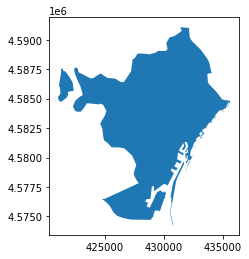

In [41]:
barcelona =municipis[municipis["NOMMUNI"].isin(['Barcelona'])]
barcelona.plot()

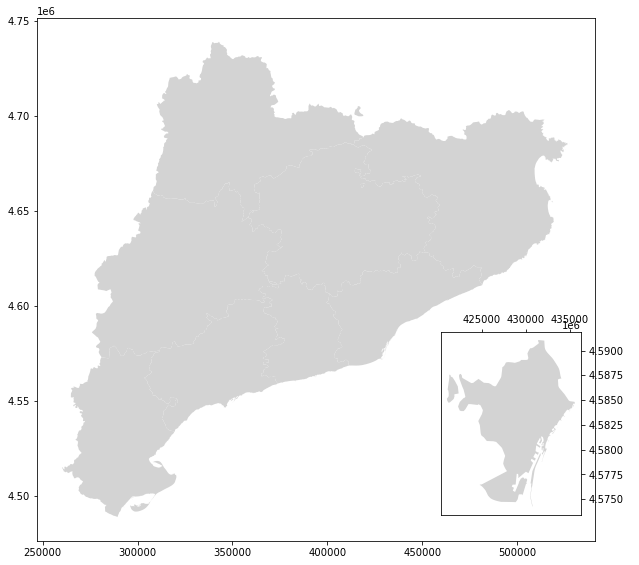

In [42]:
#make a plot without information to see Catalonia is complete with our division
f, ax = plt.subplots(figsize=(10,10))

axin1 = ax.inset_axes([0.65, 0.05, 0.4, 0.35])
axin1.xaxis.tick_top()
axin1.yaxis.tick_right()

BCN_comarques.plot(ax=ax, color="lightgray")
tarragona.plot(ax=ax, color="lightgray")
terres_de_lebre.plot(ax=ax, color="lightgray")
area_metropolitana_BCN.plot(ax=ax, color="lightgray")
girona.plot(ax=ax, color="lightgray")
lleida.plot(ax=ax, color="lightgray")

barcelona.plot(ax=axin1, color="lightgray")

In [43]:
myterritories=pd.concat([BCN_comarques, girona, lleida, tarragona, terres_de_lebre, area_metropolitana_BCN])
myterritories

,CODIVEGUE,NOMVEGUE,CAPVEGUE,AREAV5000,geometry
3,07,Catalunya Central,*,5057.499443,"MULTIPOLYGON (((371355.616 4611241.896, 371360..."
4,02,Girona,Girona,5581.293163,"MULTIPOLYGON (((482690.024 4613155.364, 482688..."
0,06,Alt Pirineu,*,5142.598106,"MULTIPOLYGON (((360800.100 4649174.000, 360624..."
5,03,Lleida,Lleida,5584.003483,"POLYGON ((348524.976 4664596.302, 348224.932 4..."
2,04,Camp de Tarragona,Tarragona,2703.384680,"MULTIPOLYGON (((335047.090 4547015.090, 335000..."
7,05,Terres de l'Ebre,Tortosa,3305.861416,"MULTIPOLYGON (((300644.450 4494148.850, 300643..."
1,01,Barcelona,Barcelona,2350.074284,"MULTIPOLYGON (((430781.151 4576638.077, 430763..."
6,08,Penedès,*,1746.282584,"MULTIPOLYGON (((386888.695 4561204.584, 386881..."


In [44]:
data2

,Territories,schooled_child,total
0,Barcelona ciutat,1936.0,2366.0
1,Barcelona comarques,2688.0,3143.0
2,Girona,1217.0,1509.0
3,Lleida,1266.0,1551.0
4,Tarragona,1199.0,1444.0
5,Terres de l'Ebre,889.0,1056.0
6,Àrea Metropolitana BCN,940.0,1104.0


In [60]:
myterrories=myterritories.drop(["school_child","school_child_rel","total" ], axis=1)

In [45]:
#create a new column with the number of children to be schoolarized
myterritories.insert(5, "school_child", [2688,  1217, 1266, 1266, 1199,  889, 940,  940], True)
myterritories.insert(6, "total", [3143,  1509, 1509, 1509, 1444,  1056, 1104,  1104], True)
myterritories

,CODIVEGUE,NOMVEGUE,CAPVEGUE,AREAV5000,geometry,school_child,total
3,07,Catalunya Central,*,5057.499443,"MULTIPOLYGON (((371355.616 4611241.896, 371360...",2688,3143
4,02,Girona,Girona,5581.293163,"MULTIPOLYGON (((482690.024 4613155.364, 482688...",1217,1509
0,06,Alt Pirineu,*,5142.598106,"MULTIPOLYGON (((360800.100 4649174.000, 360624...",1266,1509
5,03,Lleida,Lleida,5584.003483,"POLYGON ((348524.976 4664596.302, 348224.932 4...",1266,1509
2,04,Camp de Tarragona,Tarragona,2703.384680,"MULTIPOLYGON (((335047.090 4547015.090, 335000...",1199,1444
7,05,Terres de l'Ebre,Tortosa,3305.861416,"MULTIPOLYGON (((300644.450 4494148.850, 300643...",889,1056
1,01,Barcelona,Barcelona,2350.074284,"MULTIPOLYGON (((430781.151 4576638.077, 430763...",940,1104
6,08,Penedès,*,1746.282584,"MULTIPOLYGON (((386888.695 4561204.584, 386881...",940,1104


In [46]:
#calcule the relative data
school_child_rel=myterritories.school_child/total
school_child_rel

3    0.220817
4    0.099975
0    0.104001
5    0.104001
2    0.098497
7    0.073030
1    0.077220
6    0.077220
Name: school_child, dtype: float64

In [47]:
#calcule the relative data
school_child_rel_reg=myterritories.school_child/myterritories.total
school_child_rel_reg

3    0.855234
4    0.806494
0    0.838966
5    0.838966
2    0.830332
7    0.841856
1    0.851449
6    0.851449
dtype: float64

In [48]:
myterritories.insert(7, "school_child_rel", school_child_rel, True)
myterritories.insert(8, "school_child_rel_reg", school_child_rel_reg, True)
myterritories

,CODIVEGUE,NOMVEGUE,CAPVEGUE,AREAV5000,geometry,school_child,total,school_child_rel,school_child_rel_reg
3,07,Catalunya Central,*,5057.499443,"MULTIPOLYGON (((371355.616 4611241.896, 371360...",2688,3143,0.220817,0.855234
4,02,Girona,Girona,5581.293163,"MULTIPOLYGON (((482690.024 4613155.364, 482688...",1217,1509,0.099975,0.806494
0,06,Alt Pirineu,*,5142.598106,"MULTIPOLYGON (((360800.100 4649174.000, 360624...",1266,1509,0.104001,0.838966
5,03,Lleida,Lleida,5584.003483,"POLYGON ((348524.976 4664596.302, 348224.932 4...",1266,1509,0.104001,0.838966
2,04,Camp de Tarragona,Tarragona,2703.384680,"MULTIPOLYGON (((335047.090 4547015.090, 335000...",1199,1444,0.098497,0.830332
7,05,Terres de l'Ebre,Tortosa,3305.861416,"MULTIPOLYGON (((300644.450 4494148.850, 300643...",889,1056,0.073030,0.841856
1,01,Barcelona,Barcelona,2350.074284,"MULTIPOLYGON (((430781.151 4576638.077, 430763...",940,1104,0.077220,0.851449
6,08,Penedès,*,1746.282584,"MULTIPOLYGON (((386888.695 4561204.584, 386881...",940,1104,0.077220,0.851449


<AxesSubplot:>

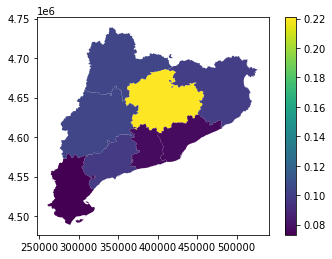

In [49]:
fig, ax = plt.subplots(1, 1)

myterritories.plot(column='school_child_rel', ax=ax, legend=True)

<AxesSubplot:>

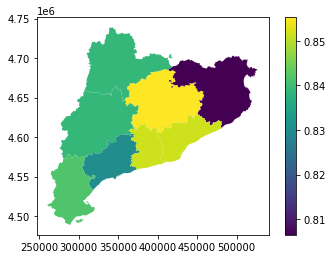

In [50]:
fig, ax = plt.subplots(1, 1)

myterritories.plot(column='school_child_rel_reg', ax=ax, legend=True)

In [51]:
#we need to add barcelona, repeat the same

In [52]:
barcelona

,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry
77,080193,Barcelona,Barcelona,101.843825,13,Barcelonès,Barcelona,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"MULTIPOLYGON (((430781.151 4576638.077, 430763..."


In [53]:
barcelona=barcelona.drop(['CODIMUNI','NOMMUNI', 'CAPMUNI', 'CODICOMAR', 'NOMCOMAR', 'CAPCOMAR', 'CODIPROV', 'NOMPROV', 'CAPPROV'], axis=1)

In [54]:
barcelona

,AREAM5000,CODIVEGUE,NOMVEGUE,CAPVEGUE,geometry
77,101.843825,01,Barcelona,Barcelona,"MULTIPOLYGON (((430781.151 4576638.077, 430763..."


In [55]:
barcelona.insert(5, "school_child", [1936], True)
barcelona.insert(6, "total", [2366], True)
barcelona.insert(7, "school_child_rel", [1936/total], True)
barcelona.insert(8, "school_child_rel_reg", [1936/2366], True)


In [56]:
barcelona

,AREAM5000,CODIVEGUE,NOMVEGUE,CAPVEGUE,geometry,school_child,total,school_child_rel_reg,school_child_rel
77,101.843825,01,Barcelona,Barcelona,"MULTIPOLYGON (((430781.151 4576638.077, 430763...",1936,2366,0.818259,0.15904


In [57]:
myterritories=pd.concat([myterritories, barcelona])
myterritories

,CODIVEGUE,NOMVEGUE,CAPVEGUE,AREAV5000,geometry,school_child,total,school_child_rel,school_child_rel_reg,AREAM5000
3,07,Catalunya Central,*,5057.499443,"MULTIPOLYGON (((371355.616 4611241.896, 371360...",2688,3143,0.220817,0.855234,NaN
4,02,Girona,Girona,5581.293163,"MULTIPOLYGON (((482690.024 4613155.364, 482688...",1217,1509,0.099975,0.806494,NaN
0,06,Alt Pirineu,*,5142.598106,"MULTIPOLYGON (((360800.100 4649174.000, 360624...",1266,1509,0.104001,0.838966,NaN
5,03,Lleida,Lleida,5584.003483,"POLYGON ((348524.976 4664596.302, 348224.932 4...",1266,1509,0.104001,0.838966,NaN
2,04,Camp de Tarragona,Tarragona,2703.384680,"MULTIPOLYGON (((335047.090 4547015.090, 335000...",1199,1444,0.098497,0.830332,NaN
7,05,Terres de l'Ebre,Tortosa,3305.861416,"MULTIPOLYGON (((300644.450 4494148.850, 300643...",889,1056,0.073030,0.841856,NaN
1,01,Barcelona,Barcelona,2350.074284,"MULTIPOLYGON (((430781.151 4576638.077, 430763...",940,1104,0.077220,0.851449,NaN
6,08,Penedès,*,1746.282584,"MULTIPOLYGON (((386888.695 4561204.584, 386881...",940,1104,0.077220,0.851449,NaN
77,01,Barcelona,Barcelona,NaN,"MULTIPOLYGON (((430781.151 4576638.077, 430763...",1936,2366,0.159040,0.818259,101.843825


Text(0.5, 1.0, 'Density of children with school age')

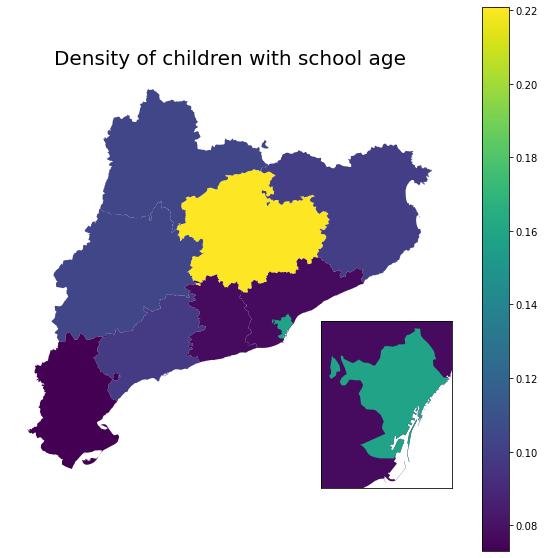

In [58]:
f, ax = plt.subplots(figsize=(10,10))

axin1 = ax.inset_axes([0.65, 0.0, 0.4, 0.4])
axin1.set_xlim(420000, 436000)
axin1.set_ylim(4571000, 4592000)

myterritories.plot(column='school_child_rel', ax=ax, legend=True)
ax.axis("off")

myterritories.plot(ax=axin1, column='school_child_rel')
axin1.get_xaxis().set_visible(False)
axin1.get_yaxis().set_visible(False)

ax.set_title("Density of children with school age", fontsize=20)

Text(0.5, 1.0, 'Density by region of children with school age')

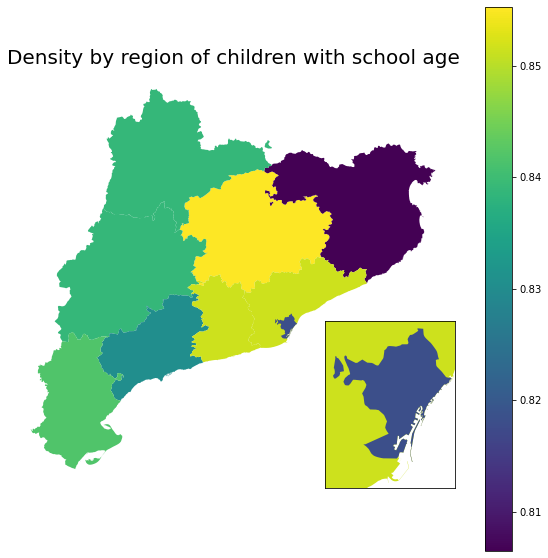

In [60]:
f, ax = plt.subplots(figsize=(10,10))

axin1 = ax.inset_axes([0.65, 0.0, 0.4, 0.4])
axin1.set_xlim(420000, 436000)
axin1.set_ylim(4571000, 4592000)

myterritories.plot(column='school_child_rel_reg', ax=ax, legend=True)
ax.axis("off")

myterritories.plot(ax=axin1, column='school_child_rel_reg')
axin1.get_xaxis().set_visible(False)
axin1.get_yaxis().set_visible(False)

ax.set_title("Density by region of children with school age", fontsize=20)